In [3]:
%load_ext autoreload
%autoreload 2

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import randn
from pandas import DataFrame, Series
from bb_binary import Repository, convert_frame_to_numpy, load_frame_container
import matplotlib.pyplot as plt
import bib.helper as helper

%matplotlib inline

In [13]:
base = "../data/1h/"

daug = "2015082215"
dsep = "2015092215"
doct = "2015102215"

folder_list = [daug, dsep, doct]

In [14]:
def get_df(frames):
    frame_list = []
    for f,c in frames:
        frame_list.append({'frameIdx': f.frameIdx,
                           'timestamp': f.timestamp,
                           'detections': len(f.detectionsUnion.detectionsDP),
                           'id': c.id,
                           'camId': c.camId
                           })
    return DataFrame(frame_list)

In [15]:
df_aug = get_df(list(Repository(base+daug).iter_frames()))
df_sep = get_df(list(Repository(base+dsep).iter_frames()))
df_oct = get_df(list(Repository(base+doct).iter_frames()))

In [18]:
# Plotten der Histogramme pro Kamera (Verteilung der Detections)
def plot_det_per_cam(df, sample):    
    plt.figure()
    
    for i in range(4):
        data = df[df.camId == i].detections

        #Plot a histogram of the dataset, note bins=10 by default
        t = "Detections per Camera for " + sample
        ax = data.plot.hist(alpha=0.7, bins=10, title=t)
        ax.set_xlabel("Number of Detections")
        ax.set_ylabel("Number of Frames (Frequency)")
        
    #plt.savefig("plots/det_per_cam_1h_{}".format(sample))

# Distribution of detections for each camera

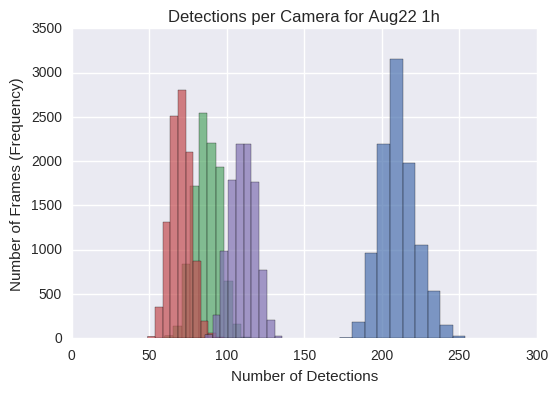

In [19]:
plot_det_per_cam(df_aug, "Aug22 1h")

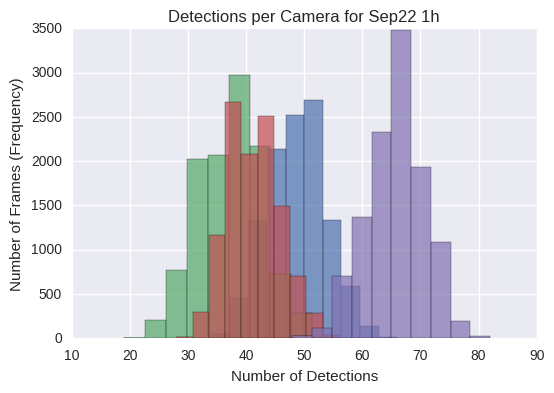

In [20]:
plot_det_per_cam(df_sep, "Sep22 1h")

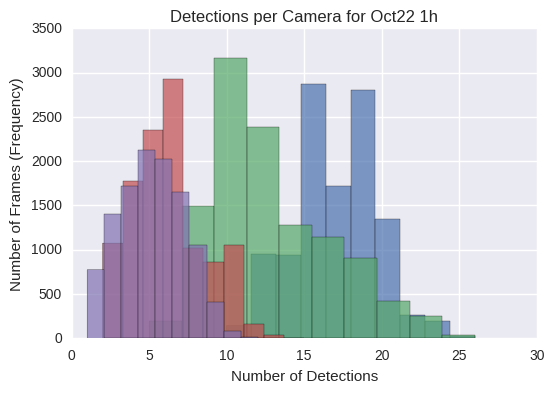

In [21]:
plot_det_per_cam(df_oct, "Oct22 1h")

# Number of Detections in total (all cameras)

In [ ]:
files = 

In [251]:
def plot_det_total(df, sample):

    plt.figure()
    
    t = "Detections in total for " + sample
    ax = df.sum_det.plot.box(title=t)
    ax.set_ylabel("Number of Detections")
    plt.savefig("plots/det_total_6m_{}".format(sample))

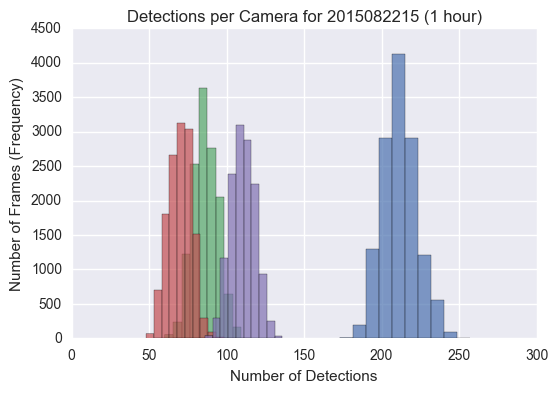

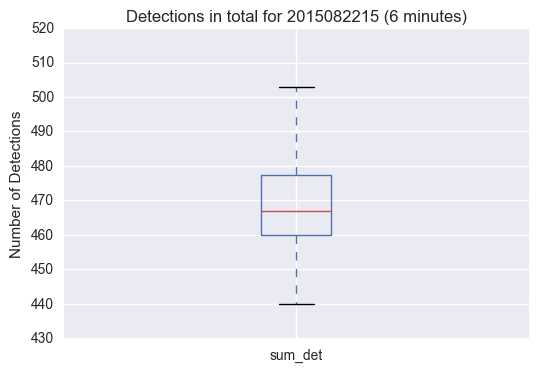

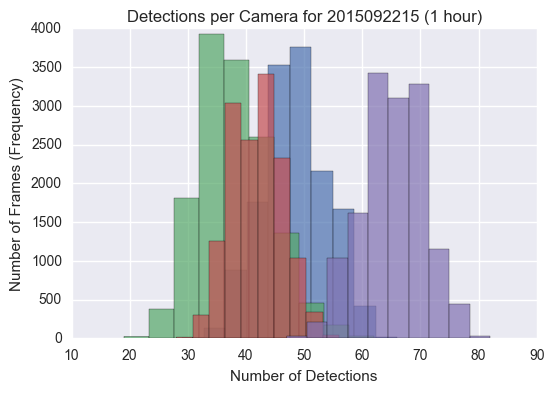

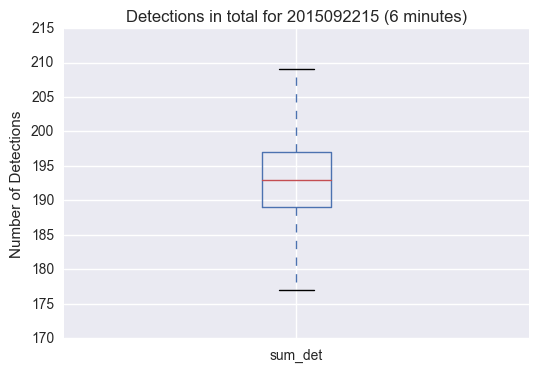

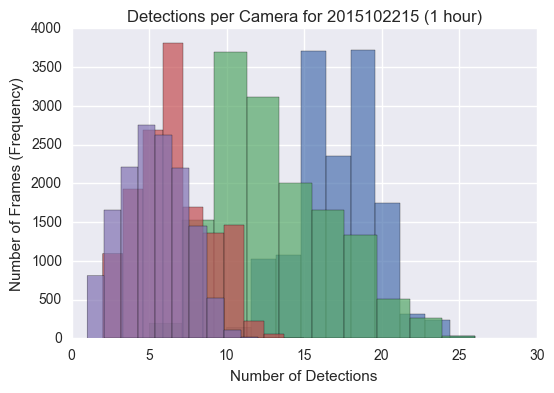

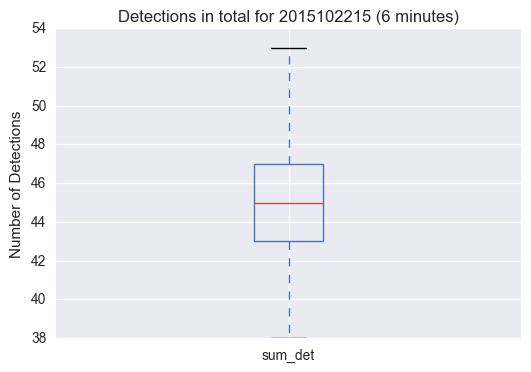

In [252]:
for p in path_list:
    r = Repository(base+p)
    plot_det_per_cam(r,p)
    plot_det_total(r,p)